# map()

اعمال یک تابع روی همه عناصر

```
map(function, iterable)

```
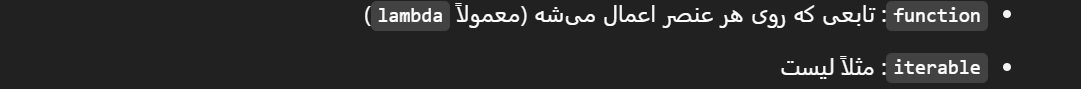


In [ ]:
numbers = [1, 2, 3, 4]
squares = map(lambda x: x**2, numbers)
print(list(squares))  # ➜ [1, 4, 9, 16]


[1, 4, 9, 16]


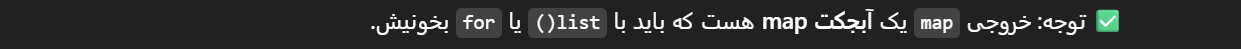

## 🔸 چند مثال کاربردی

### ✅ تبدیل متن به حروف بزرگ

In [ ]:
words = ['ali', 'iman', 'sara']
upper_words = map(str.upper, words)
print(list(upper_words))

['ALI', 'IMAN', 'SARA']


### ✅ جمع دو لیست عنصر به عنصر

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
sums = map(lambda x,y : x+y, a,b)
print(tuple(sums))

(5, 7, 9)


##  🎯 تمرین

## ✍️ تمرین 1

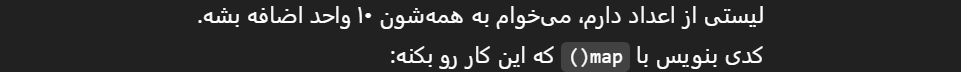


```
numbers = [5, 8, 12, 0, -3]

```

➜ خروجی باید بشه: [15, 18, 22, 10, 7]

In [ ]:
numbers = [5, 8, 12, 0, -3]
numbers_plus_10 = map(lambda x:x+10 , numbers)
print(tuple(numbers_plus_10))

(15, 18, 22, 10, 7)


## 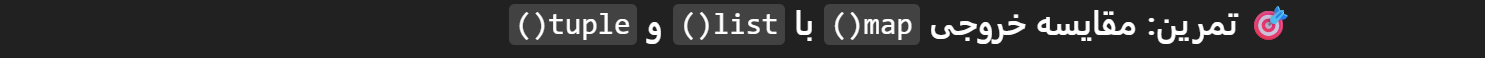

In [ ]:
def square(x):
    return x * x

numbers = range(10**6) # یک میلیون عدد

In [ ]:
from time import perf_counter
from sys import getsizeof

این سه حالت مختلف رو اجرا کن و خروجی‌ها رو ببین

In [ ]:
# حالت A:  map فقط
start = perf_counter()
mapped = map(square, numbers)
print("A ➜ type:", type(mapped))
print("A ➜ size:", getsizeof(mapped))
end = perf_counter()
print("A ➜ time:", end-start, "\n")

A ➜ type: <class 'map'>
A ➜ size: 48
A ➜ time: 0.0002460279999922932 



In [ ]:
# حالت B: list تبدیل به
start = perf_counter()
mapped_list = list(map(square, numbers))
print("B ➜ type:", type(mapped_list))
print("B ➜ size:", getsizeof(mapped_list))
end = perf_counter()
print("B ➜ time:", end - start, "\n")

B ➜ type: <class 'list'>
B ➜ size: 8448728
B ➜ time: 0.12314270899992152 



In [ ]:
# حالت C: tuple تبدیل به
start = perf_counter()
mapped_tuple = tuple(map(square, numbers))
print("C ➜ type:", type(mapped_tuple))
print("C ➜ size:", getsizeof(mapped_tuple))
end = perf_counter()
print("C ➜ time:", end - start)

C ➜ type: <class 'tuple'>
C ➜ size: 8000040
C ➜ time: 0.11370656999997664


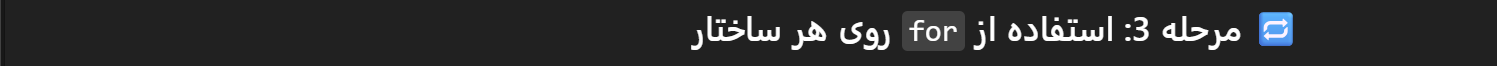

In [1]:
from time import perf_counter

def square(x):
    return x * x

numbers = range(10**6)  # یک میلیون عدد

# حالت A:  for مستقیم در map
start = perf_counter()
for item in map(square, numbers):
    pass  # هیچ کاری نمی‌کنیم، فقط می‌خونیم
end = perf_counter()
print("A ➜ map directly in for ➜ time:", end - start)


# حالت B: map مقایسه‌ی منصفانه: با کش کردن
start = perf_counter()
mapped = map(square, numbers)
for item in mapped:
    pass  # هیچ کاری نمی‌کنیم، فقط می‌خونیم
end = perf_counter()
print("B ➜ map with saved iterator ➜ time:", end - start)

# حالت C: for روی لیست
mapped_list = list(map(square, numbers))  # اول لیست بساز
start = perf_counter()
for item in mapped_list:
    pass
end = perf_counter()
print("C ➜ list + for ➜ time:", end - start)


# حالت D: for روی tuple
mapped_tuple = tuple(map(square, numbers))  # اول تاپل بساز
start = perf_counter()
for item in mapped_tuple:
    pass
end = perf_counter()
print("D ➜ tuple + for ➜ time:", end - start)


A ➜ map directly in for ➜ time: 0.23330396000000064
B ➜ map with saved iterator ➜ time: 0.24173349000000144
C ➜ list + for ➜ time: 0.036135982000004674
D ➜ tuple + for ➜ time: 0.028427560000011454


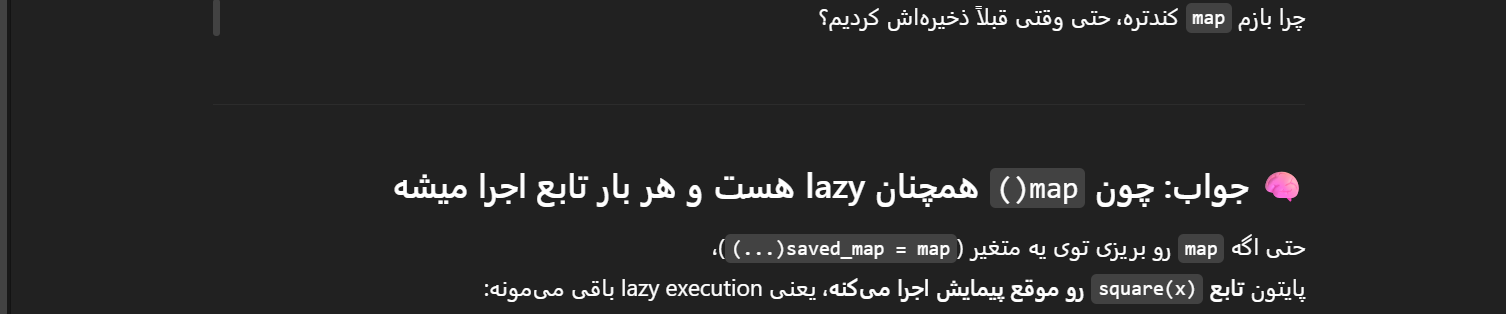

```
for item in saved_map:  # تابع square الان تازه روی هر x اجرا میشه

```
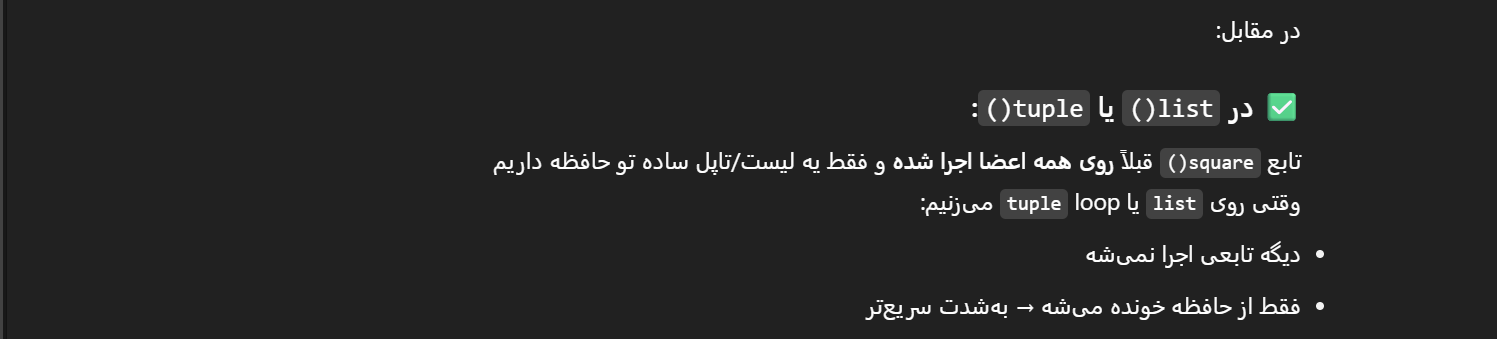

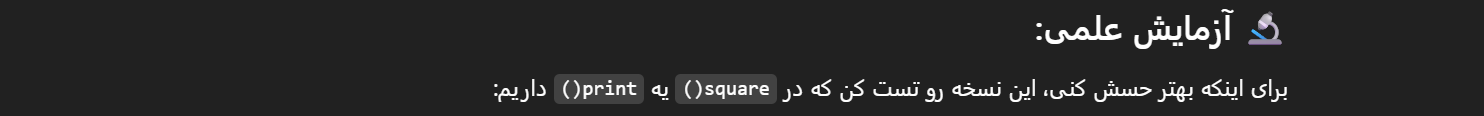


In [ ]:
def square(x):
    print(f"square({x}) called")
    return x * x

mapped = map(square, [1, 2, 3])
for item in mapped:
    pass

square(1) called
square(2) called
square(3) called


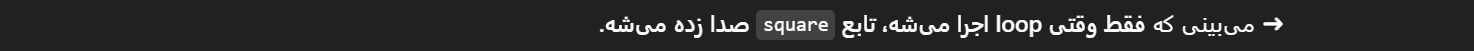


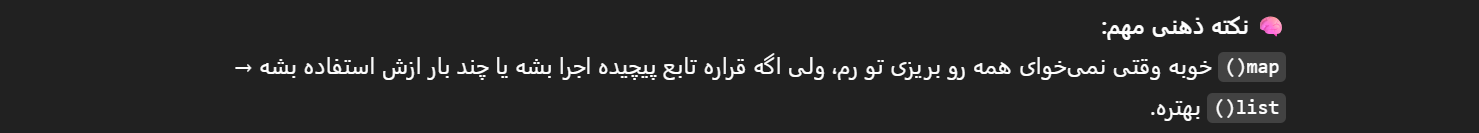

# 🎯lazy و eager مشاهده زمان و ترتیب اجرای تابع در حالت

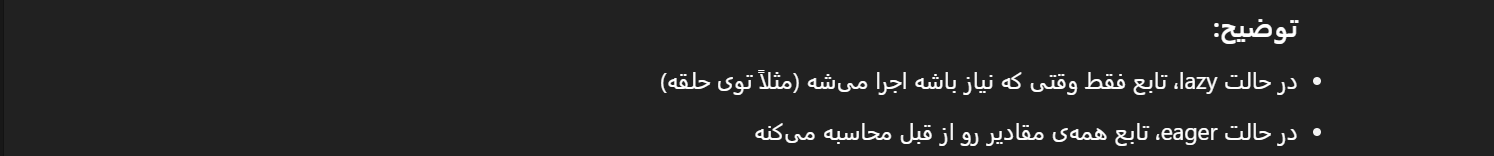

In [5]:
import time
import sys

def fun(a, b):
    print("progress")
    return a + b  # اصلاح: حاصل جمع واقعی

start = time.perf_counter()

numbers = [1, 2, 3, 4]
n = [8, 7, 6, 5]

square = map(fun, numbers, n)

print("before")
# eager!
print("eager!")
results = list(square)  #  رو همین‌جا مصرف کنیم map
for num in results:
    print(num)

print("after")

end = time.perf_counter()
print("⏱️ Duration:", end - start)

print("📦 Size in memory:", sys.getsizeof(results))

# جواب مطلوب را نمیدهد sys.getsizeof(list(square)) روش زیر برای محابه ی

# for num in list(square):
#   ...
# print(sys.getsizeof(list(square)))
# lazy!
print("lazy!")
square = map(fun, numbers, n)
for num in square:
    print(num)

before
eager!
progress
progress
progress
progress
9
9
9
9
after
⏱️ Duration: 0.000367009000001417
📦 Size in memory: 120
lazy!
progress
9
progress
9
progress
9
progress
9


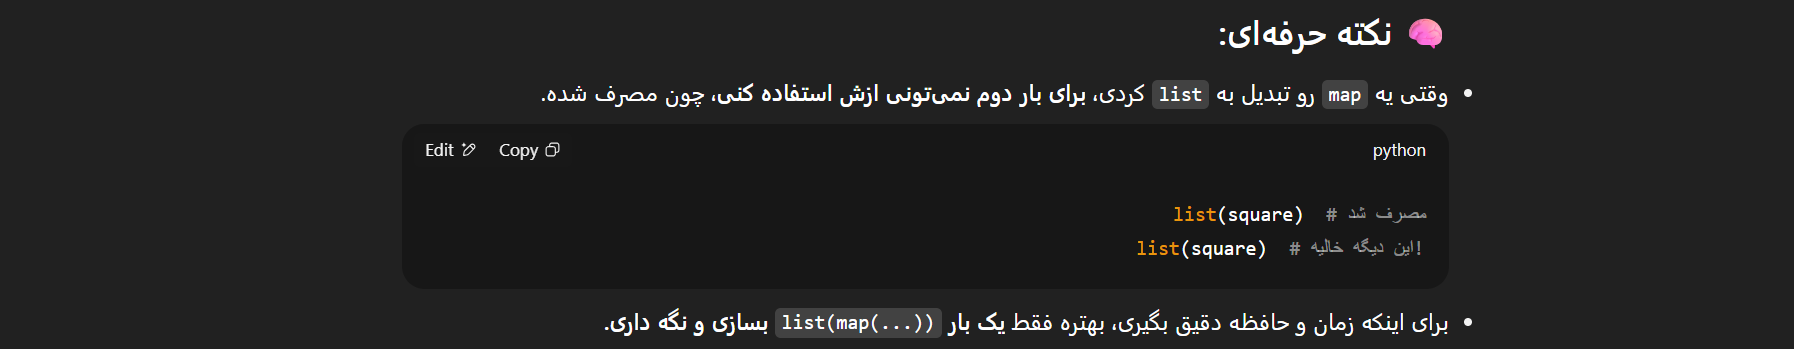

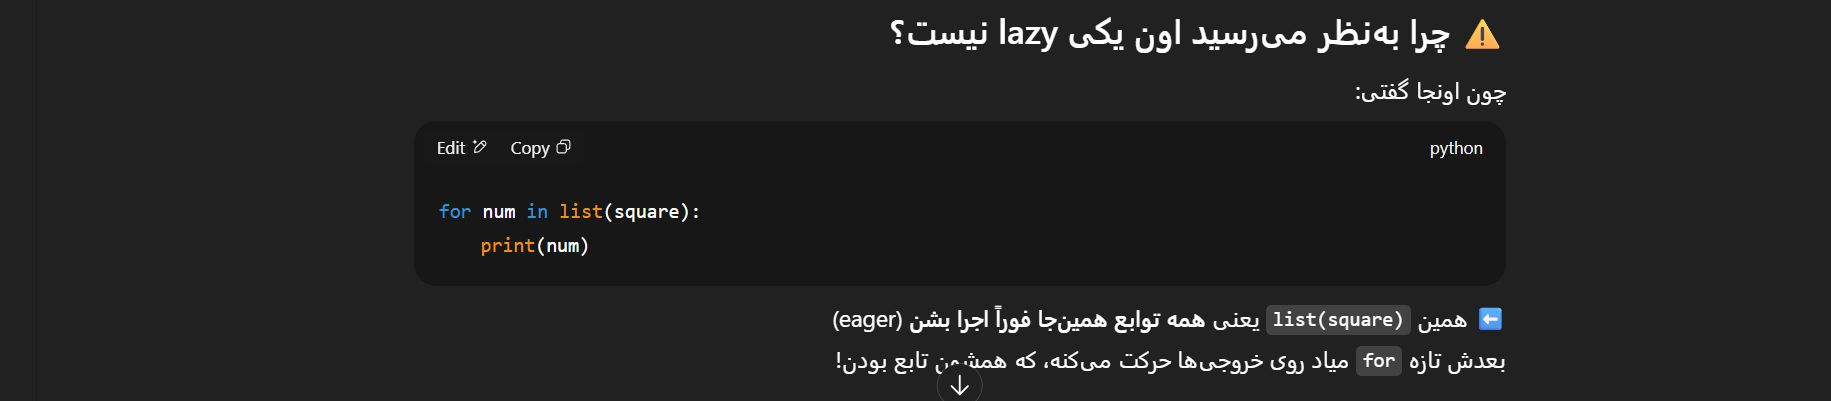

 مثال دیگر

In [ ]:
from time import sleep
def slow_double(x):
  print(f"processing {x} ...")
  sleep(0.5)
  return x

numbers = [1,2,3]
print("\n-- (مستقیم map) lazy حالت --")
lazy_result = map(slow_double, numbers)
print("created lazy_result ,اجرا نشده (map) هنوز تابع")

for val in lazy_result:
  print(f"got value: {val}")

print("\n-- حالت eager (list(map)) --")
eager_result = list(map(slow_double, numbers))
print("created eager_result (list), تابع‌ها همین الان اجرا شدن.")

for val in eager_result:
    print(f"got value: {val}")


-- (مستقیم map) lazy حالت --
created lazy_result ,اجرا نشده (map) هنوز تابع
processing 1 ...
got value: 1
processing 2 ...
got value: 2
processing 3 ...
got value: 3

-- حالت eager (list(map)) --
processing 1 ...
processing 2 ...
processing 3 ...
created eager_result (list), تابع‌ها همین الان اجرا شدن.
got value: 1
got value: 2
got value: 3


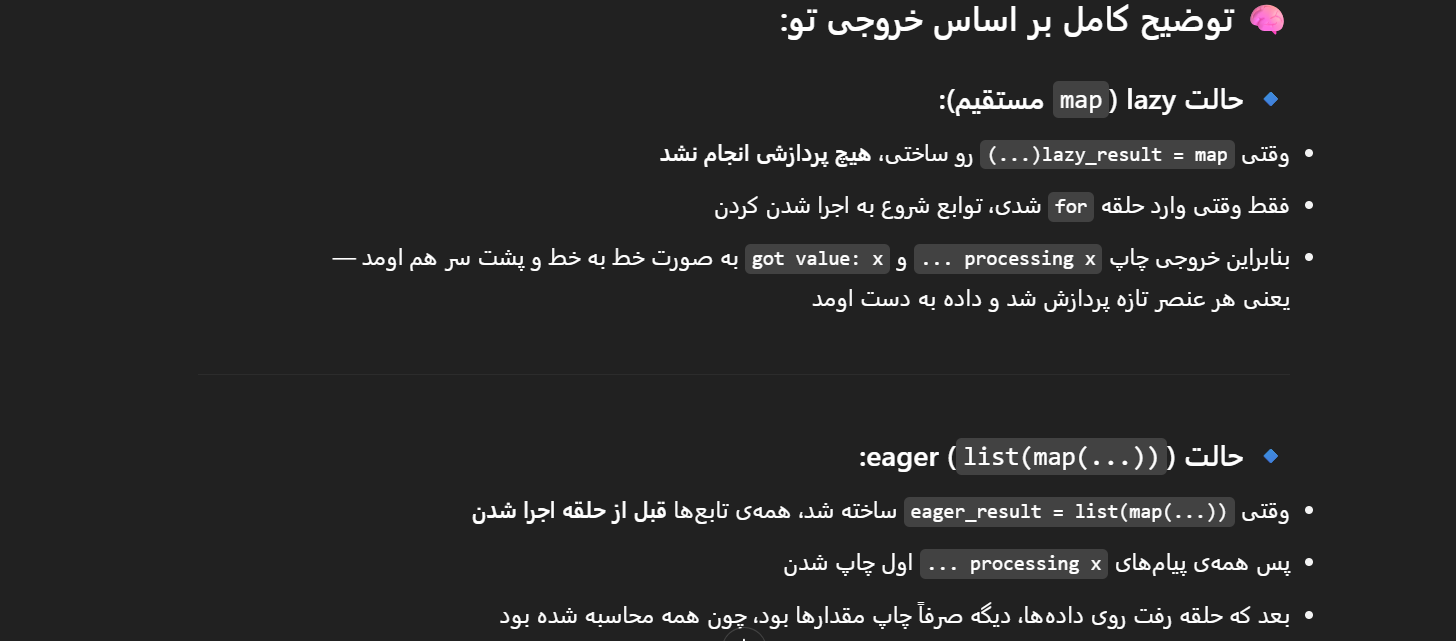
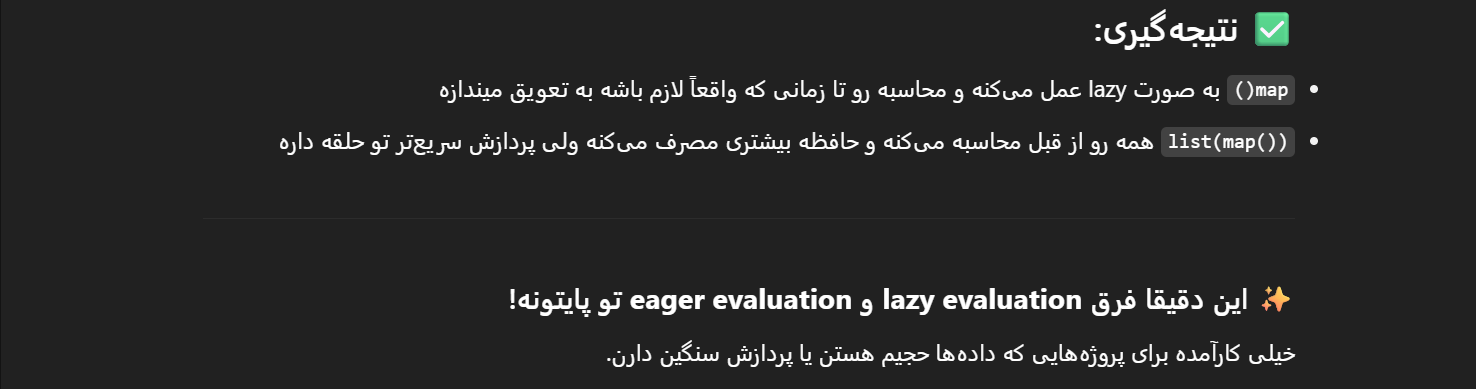

# filter()

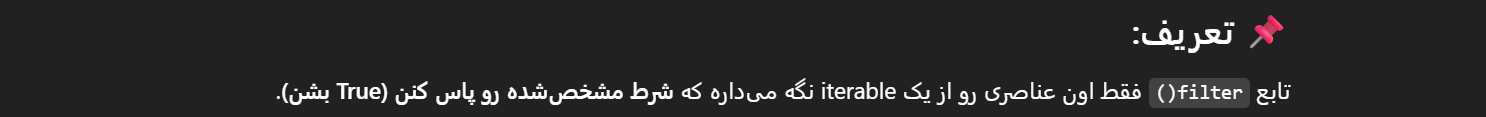

## 🧠 ساختار کلی:

```
filter(function, iterable)

```
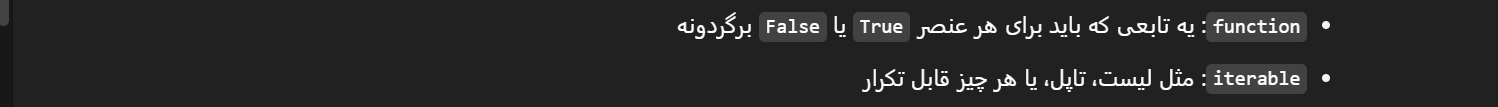


## ✅ مثال

### مثال 1

In [ ]:
numbers = [1, 2, 3, 4, 5, 6]
even_numbers = filter(lambda x:x%2==0, numbers)
print(list(even_numbers))

[2, 4, 6]


### مثال 2

فیلتر کردن کلمات بلندتر از 5 حرف

In [ ]:
words = ["ali", "mohammad", "iman", "sara", "kambiz"]
long_words = filter(lambda word: len(word)>5, words)
print(list(long_words))

['mohammad', 'kambiz']


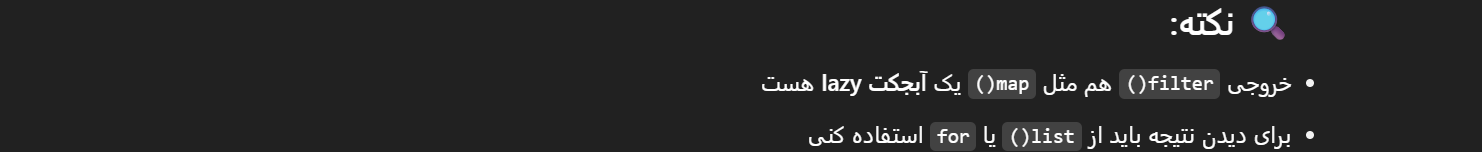

## 🎯 تمرین

### تمرین 1

لیستی از اعداد زیر رو داریم:


```
nums = [-3, 0, 2, 5, -10, 8, 1, -1]
```
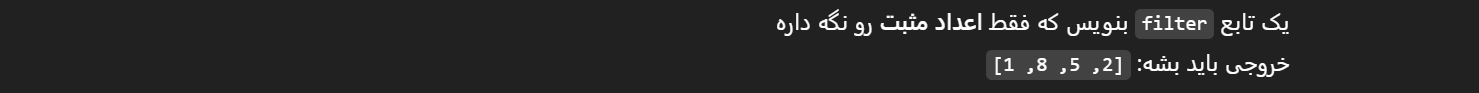


In [ ]:
nums = [-3, 0, 2, 5, -10, 8, 1, -1]
positive_numbers = filter(lambda number: number>0, nums)
print(list(positive_numbers))

[2, 5, 8, 1]


### 🎯 تمرین ۲ (یک ذره سخت‌تر):
یه لیست از رشته‌ها داریم:


```
#names = ["ali", "sara", "soroush", "mina", "mohammad", "iman"]

```
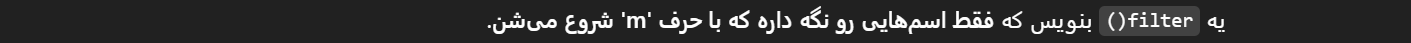



In [ ]:
names = ["ali", "sara", "soroush", "mina", "mohammad", "iman"]
names_m = filter(lambda name:name[0].lower()=="m", names)
print(list(names_m))

['mina', 'mohammad']


# ✨ چند قانون طلایی نام‌گذاری حرفه‌ای:

# 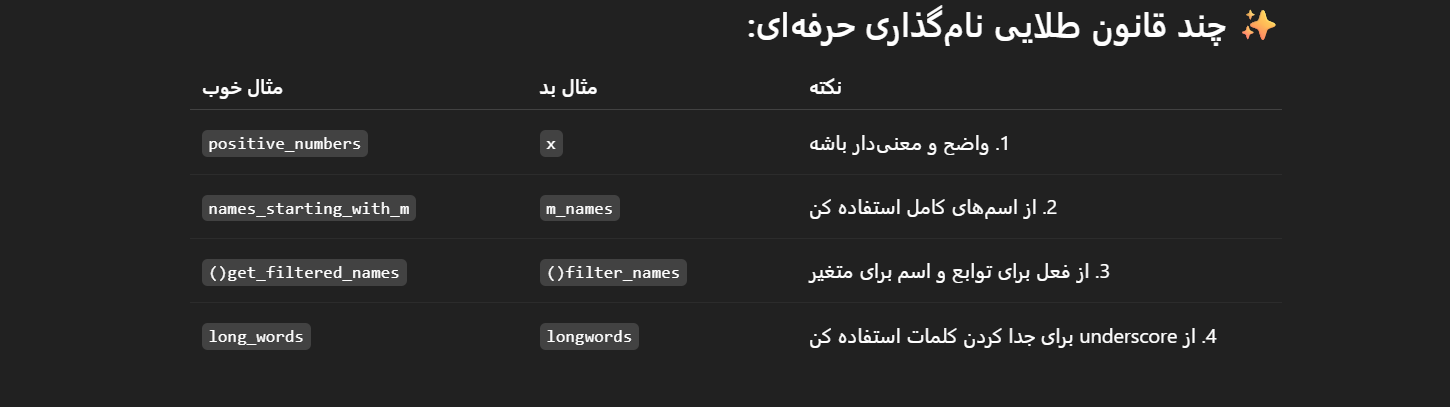

# reduce()

```
from functools import reduce
```



## تمرین 1

In [ ]:
from functools import reduce
words = ["Python", "is", "awesome"]
output=reduce(lambda x,y: x + " " + y, words)
print(output)

## تمرین 2

In [ ]:
from functools import reduce
nums = [5, 2, 8, 1, 6]
maximum = reduce(lambda x,y: x if x>y else y,nums )
print(maximum)

## تمرین ۳

In [ ]:
# my version (9/10)
from functools import reduce
words = ["i", "love", "Python", "very", "much"]
acronym = reduce(lambda x,y: x.upper() + y[0].upper(), words)
print(acronym)

In [ ]:
# chatGPT version:
from functools import reduce
words = ["i", "love", "Python", "very", "much"]

acronym = reduce(lambda acc, word: acc + word[0].upper(), words, "")
print(acronym)


# 🎯 تمرین: ساخت دیکشنری از دو لیست

In [ ]:
from functools import reduce
keys = ["name", "age", "country"]
values = ["Iman", 41, "Italy"]
my_dict = reduce(lambda k,v: {k:v}, keys, values, {} )
print(my_dict)

In [ ]:
x={'a':1}
y={'b':2}
print({'a':1})